In [1]:
%display typeset

# Usando Modelos Populacionais Logísticos para Epidemias
Nesta aula vamos conhecer o modelo logístico de Richards, e estuda sua aplicabilidade no estudo de epidemias. Este notebook se baseia [neste artigo](https://userweb.ucs.louisiana.edu/~xxw6637/papers/JTB2012.pdf)

O modelo de Richards se baseia em um modelo proposto por Verhulst em 1838.

$$\frac{dN(t)}{dt}=r N(t)\left[1-\frac{N(t)}{K}\right]$$

Richards generalizou este modelo em 1959, adicionando o parâmetro $a$ permitindo o desvio da dependência estrita da densidade.

In [6]:
var('C r1 K a t')
C = function('C')(t)
dcdt = diff(C,t)==r1*C(1-(C/K)^a)
dcdt

diff(C(t), t) == r1*C(-(C(t)/K)^a + 1)

In [12]:
desolve(dcdt, C, ivar=t)

integrate(1/C(-(C(t)/K)^a + 1), C(t))/r1 == _C + t

O modelo de Richards admite uma solução explícita:

$$C(t)=K\left[1+a e^{-a r1(t-t_c)}\right]^{-1/a},$$

onde $t_c$ é o ponto no tempo em que a segunda derivada de $C(t)$ se torna 0, ou seja, quando $C(t)=K(1+a)^{-1/a}$. Seja $r=a r1$, então a equação acima se torna:
$$C(t)=K\left[1+a e^{-r(t-t_c)}\right]^{-1/a}.$$

## Relação com o modelo SIR
Seja o modelo SIR,
$$
\frac{dS}{dt} = -\beta S I/N \label{dsdt}
$$
$$\frac{dI}{dt} = \beta S I/N -\gamma I$$
$$\frac{dR}{dt} = \gamma I$$

Onde podemos considerar que $N=S+I$. A partir das equações acima temos que

$$\frac{d(S+I)}{ds}=\frac{\gamma (S+I)}{\beta S}$$

cuja solução é:

$$S(t)+I(t) = cS(t)^{\gamma/\beta} \label{eq10}$$

onde

$$c:=[S(0)+I(0)]S(0)^{\gamma/\beta}$$

combinando (\ref{dsdt}) e (\ref{eq10}) obtemos:

$$\frac{dS}{dt}=-\beta S[1-(S/L)^\alpha] \label{eq12}$$

onde $\alpha:= 1-\gamma/\beta$ e $L:=c^{1/(1-\gamma/\beta)}$.

Como a equação (\ref{eq12}) tem a mesma forma que a equação (\ref{dsdt}), pode ser resolvida como:

$$S(t)=L[1+\alpha e^{b(t-t_j)}]^{-1/\alpha}$$

onde $b=\alpha\beta$ e $t_j$ o tempo finito em que a segunda derivada de $S(t)$ é $0$.

Como estamos interessados no numero acumulado de de casos, podemos definir:

\begin{align}
J(t) :=& I(t)+R(t)\nonumber\\
=& N-S(t)\nonumber\\
=& N-L[1+\alpha e^{b(t-t_j)}]^{-1/\alpha}
\end{align}

Sendo $N=S(0)+I(0)$ então $N \approx L$. Como $I(0)/S(0)\rightarrow 0$,

$$J(t)\approx L-L[1+\alpha e^{b(t-t_j)}]^{-1/\alpha}.$$

Esta última equação nos dá uma forma eficiente de mapear uma curva de casos acumulados ao modelo SIR sem utilizar equações diferenciais.

Na prática podemos igualar $L$ ao tamanho final da epidemia, e $t_j$ ao ponto de inflexão da curva. Temos ainda que $\alpha=1-1/{\cal R}_0$, e $b=\beta -\gamma$ a taxa de geração de infeções.

### Instante do pico, $t_i$
O pico da epidemia ocorre quando $\dot{I}(t_i)=0$ o que implica que 
$$\frac{\beta S(t_i)}{S(t_i)+I(t_i)}=\gamma$$

Considerando as equações (\ref{eq10}) e $\alpha:= 1-\gamma/\beta$ e $L:=c^{1/(1-\gamma/\beta)}$, podemos obter

$$S(t_i)=L (\beta/\gamma)^{-1/\alpha}$$

combinando as duas equações acima temos

$$I(t_i)=L{\cal R}_0^{-{\cal R}_0/({\cal R}_0-1)}({\cal R}_0-1)$$

com 

$${\cal R}_0=e^{b(t_i-t_j)}$$.

## Ajustando o modelo de Richards a Dados
Agora vamos ver como o modelo de Richards se presta para representar uma epidemia com múltiplas ondas. Vamos utilizar os dados da Epidemia da COVID-19 em 2020 e 21

In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
ukd = pd.read_csv('UK_covid.csv')
ukd['date'] = pd.to_datetime(ukd.date)
ukd.set_index('date', inplace=True)
ukd

,total_cases,new_cases,location,total_deaths,new_deaths,total_vaccinations,new_vaccinations,stringency_index,population
date,,,,,,,,,
2020-01-31,2,2,United Kingdom,NaN,NaN,NaN,NaN,8.33,68207114
2020-02-01,2,0,United Kingdom,NaN,NaN,NaN,NaN,8.33,68207114
2020-02-02,2,0,United Kingdom,NaN,NaN,NaN,NaN,11.11,68207114
2020-02-03,8,6,United Kingdom,NaN,NaN,NaN,NaN,11.11,68207114
2020-02-04,8,0,United Kingdom,NaN,NaN,NaN,NaN,11.11,68207114
...,...,...,...,...,...,...,...,...,...
2021-08-24,6586181,30762,United Kingdom,132174.0,174.0,89865264.0,186086.0,43.98,68207114
2021-08-25,6621799,35618,United Kingdom,132323.0,149.0,90095045.0,229781.0,43.98,68207114
2021-08-26,6659916,38117,United Kingdom,132465.0,142.0,90295121.0,200076.0,43.98,68207114


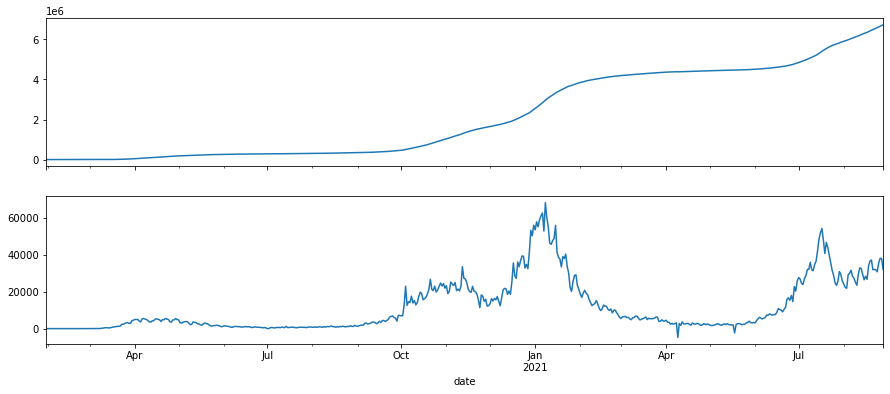

In [11]:
fig , [a1,a2] = plt.subplots(2,1, figsize=[15,6], sharex=True)
ukd.total_cases.plot(ax=a1);
ukd.new_cases.plot(ax=a2);

In [36]:
def rich(L,a,b,t,tj):
    j=L-L*(1+a*np.exp(b*(t-tj)))**(-1/a)
    return j
df = ukd.reset_index()
@interact
def plot_richards(w1=range_slider(1,180,step_size=1,default=(1,160)), 
                  tp1=(86,(10,150)),L1=(.3e6,(.1e6,1.5e6)),a1=(0.1,(0.1,1)),b1=(0.2,(0.001,.2,.01)),
                  w2=range_slider(180,350,step_size=1,default=(210,300)), 
                  tp2=(277,(230,350)),L2=(1e6,(.9e6,3.5e6)),a2=(0.1,(0.1,1)),b2=(0.2,(0.001,.2,.01)),
                  w3=range_slider(220,400,step_size=1,default=(300,400)), 
                  tp3=(329,(220,400)),L3=(2e6,(1e6,4.5e6)),a3=(0.1,(0.1,1)),b3=(0.2,(0.001,.2,.01)),
                 ):
    fig,ax = plt.subplots(1,1, figsize=(15,8))
    df.total_cases.plot(ax=ax, label='Total cases',style='+')
    plt.plot(range(w1[0],w1[1]), [rich(L1,a1,b1,t,tp1) for t in range(w1[0],w1[1])], label='onda 1')
    plt.plot(range(w2[0],w2[1]), [L1+rich(L2,a2,b2,t,tp2) for t in range(w2[0],w2[1])], label='onda 2')
    plt.plot(range(w3[0],w3[1]), [L2+rich(L3,a3,b3,t,tp3) for t in range(w3[0],w3[1])], label='onda 3')
    plt.grid()
    plt.legend()

Interactive function <function plot_richards at 0x7f046fa235e0> with 15 widgets
  w1: TransformIntRangeSlider(…

## Encontrando os Parâmetros por otimização

In [37]:
import sherpa

In [68]:
!pip install gpyopt

You should consider upgrading via the '/home/fccoelho/Downloads/SageMath/local/bin/python3 -m pip install --upgrade pip' command.


In [46]:
parameters = [
    sherpa.Discrete(name='L1', range=[.1e6,1e6]),
    sherpa.Discrete(name='tp1', range=[10,150]),
#     sherpa.Discrete(name='s1', range=[1,180]), #inicio da onda
#     sherpa.Discrete(name='d1', range=[10,180]), # duração da onda 
    sherpa.Continuous(name='a1', range=[0,1]),
    sherpa.Continuous(name='b1', range=[0,1]),
]

In [93]:
# algorithm = sherpa.algorithms.RandomSearch(max_num_trials=2000)
algorithm = sherpa.algorithms.SuccessiveHalving(max_finished_configs=500)
study = sherpa.Study(parameters=parameters,
                     algorithm=algorithm,
                     lower_is_better=True,
                     disable_dashboard=True)

In [94]:
trial = study.get_suggestion()
trial.parameters

{'L1': 257465,
 'tp1': 116,
 'a1': 0.3479896982752564,
 'b1': 0.06494139156730783,
 'resource': 1,
 'rung': 0,
 'load_from': '',
 'save_to': '1'}

In [95]:
s=1
e=160
for trial in study:
    L = trial.parameters['L1']
    tp = trial.parameters['tp1']
    a = trial.parameters['a1']
    b = trial.parameters['b1']
    dado = df.loc[s:e].total_cases.values
    sig = [rich(L,a,b,t,tp) for t in range(s,e)]
    
    loss = sum((dado[s:e]-sig)**2)/(e-s)
    study.add_observation(trial=trial,
                          objective=loss,
                          )
    study.finalize(trial)

In [97]:
res = study.get_best_result()
res

{'Trial-ID': 5801,
 'Iteration': 1,
 'L1': 280608,
 'a1': 0.298767528283268,
 'b1': 0.056357823970169973,
 'load_from': '',
 'resource': 1,
 'rung': 0,
 'save_to': '5801',
 'tp1': 91,
 'Objective': 152888426.20476854}

In [98]:
sig = [rich(res['L1'],res['a1'],res['b1'],t,res['tp1']) for t in range(s,e+1)]

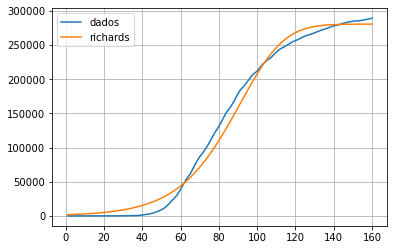

In [99]:
plt.plot(range(s,e+1),dado,label='dados')
plt.plot(range(s,e+1),sig, label='richards')
plt.grid()
plt.legend();